In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import warnings

warnings.filterwarnings( 'ignore' )

In [8]:
train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv")

In [9]:
x_data = train_data.loc[:, 'f0':'f99']
y_data = train_data.loc[:, 'loss']

In [6]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,   #전체 중 20%를 테스트용으로 분할
                                                                   #나머지 80%는 훈련용
                                                  shuffle=True,    #무작위로 섞어서 추출
                                                  random_state=20) #무작위 추출 시 일정한 기준으로

In [8]:
# catboost 참고 코드: https://catboost.ai/docs/concepts/python-usages-examples.html
# parameter tuning: https://catboost.ai/docs/concepts/parameter-tuning.html
from catboost import CatBoostRegressor
import catboost as cb

In [9]:
train_pool = cb.Pool(x_train, y_train)
test_pool = cb.Pool(x_test)

In [26]:
model = CatBoostRegressor(iterations=10000,
                          learning_rate=0.01,
                          depth=10,
                          random_seed = 20,
                          l2_leaf_reg = 1,
                          loss_function='RMSE')
model.fit(train_pool)

0:	learn: 7.9498293	total: 125ms	remaining: 20m 54s
1:	learn: 7.9492246	total: 220ms	remaining: 18m 20s
2:	learn: 7.9485695	total: 309ms	remaining: 17m 9s
3:	learn: 7.9479056	total: 404ms	remaining: 16m 48s
4:	learn: 7.9473168	total: 488ms	remaining: 16m 15s
5:	learn: 7.9466645	total: 581ms	remaining: 16m 7s
6:	learn: 7.9460523	total: 688ms	remaining: 16m 22s
7:	learn: 7.9455692	total: 780ms	remaining: 16m 13s
8:	learn: 7.9449486	total: 873ms	remaining: 16m 9s
9:	learn: 7.9443450	total: 979ms	remaining: 16m 18s
10:	learn: 7.9437499	total: 1.08s	remaining: 16m 17s
11:	learn: 7.9431405	total: 1.18s	remaining: 16m 18s
12:	learn: 7.9425728	total: 1.28s	remaining: 16m 27s
13:	learn: 7.9419842	total: 1.4s	remaining: 16m 35s
14:	learn: 7.9414463	total: 1.48s	remaining: 16m 27s
15:	learn: 7.9408117	total: 1.57s	remaining: 16m 21s
16:	learn: 7.9402464	total: 1.67s	remaining: 16m 19s
17:	learn: 7.9396221	total: 1.78s	remaining: 16m 28s
18:	learn: 7.9390455	total: 1.87s	remaining: 16m 23s
19:	lea

155:	learn: 7.8771942	total: 13.9s	remaining: 14m 37s
156:	learn: 7.8768595	total: 14s	remaining: 14m 38s
157:	learn: 7.8765324	total: 14.1s	remaining: 14m 37s
158:	learn: 7.8760070	total: 14.2s	remaining: 14m 37s
159:	learn: 7.8756453	total: 14.3s	remaining: 14m 37s
160:	learn: 7.8752968	total: 14.3s	remaining: 14m 36s
161:	learn: 7.8748927	total: 14.4s	remaining: 14m 36s
162:	learn: 7.8744302	total: 14.5s	remaining: 14m 36s
163:	learn: 7.8738998	total: 14.6s	remaining: 14m 36s
164:	learn: 7.8734528	total: 14.7s	remaining: 14m 36s
165:	learn: 7.8731386	total: 14.8s	remaining: 14m 36s
166:	learn: 7.8728312	total: 14.9s	remaining: 14m 36s
167:	learn: 7.8724455	total: 15s	remaining: 14m 36s
168:	learn: 7.8720508	total: 15.1s	remaining: 14m 36s
169:	learn: 7.8716755	total: 15.2s	remaining: 14m 36s
170:	learn: 7.8712389	total: 15.3s	remaining: 14m 36s
171:	learn: 7.8708287	total: 15.3s	remaining: 14m 36s
172:	learn: 7.8704481	total: 15.4s	remaining: 14m 36s
173:	learn: 7.8701211	total: 15.

310:	learn: 7.8184054	total: 28s	remaining: 14m 32s
311:	learn: 7.8179471	total: 28.1s	remaining: 14m 32s
312:	learn: 7.8174868	total: 28.2s	remaining: 14m 32s
313:	learn: 7.8172294	total: 28.3s	remaining: 14m 32s
314:	learn: 7.8168724	total: 28.4s	remaining: 14m 32s
315:	learn: 7.8165534	total: 28.5s	remaining: 14m 32s
316:	learn: 7.8162199	total: 28.5s	remaining: 14m 31s
317:	learn: 7.8159130	total: 28.6s	remaining: 14m 31s
318:	learn: 7.8155201	total: 28.7s	remaining: 14m 31s
319:	learn: 7.8150808	total: 28.8s	remaining: 14m 31s
320:	learn: 7.8147373	total: 28.9s	remaining: 14m 31s
321:	learn: 7.8143305	total: 29s	remaining: 14m 31s
322:	learn: 7.8139622	total: 29.1s	remaining: 14m 31s
323:	learn: 7.8135479	total: 29.2s	remaining: 14m 31s
324:	learn: 7.8132276	total: 29.3s	remaining: 14m 31s
325:	learn: 7.8129703	total: 29.3s	remaining: 14m 30s
326:	learn: 7.8124467	total: 29.4s	remaining: 14m 31s
327:	learn: 7.8120315	total: 29.6s	remaining: 14m 31s
328:	learn: 7.8117141	total: 29.

464:	learn: 7.7641698	total: 42.3s	remaining: 14m 26s
465:	learn: 7.7638054	total: 42.3s	remaining: 14m 26s
466:	learn: 7.7634041	total: 42.4s	remaining: 14m 26s
467:	learn: 7.7630473	total: 42.5s	remaining: 14m 26s
468:	learn: 7.7627580	total: 42.6s	remaining: 14m 26s
469:	learn: 7.7624509	total: 42.7s	remaining: 14m 26s
470:	learn: 7.7621496	total: 42.8s	remaining: 14m 26s
471:	learn: 7.7616736	total: 42.9s	remaining: 14m 26s
472:	learn: 7.7613442	total: 43s	remaining: 14m 26s
473:	learn: 7.7610329	total: 43.1s	remaining: 14m 25s
474:	learn: 7.7607225	total: 43.2s	remaining: 14m 25s
475:	learn: 7.7604425	total: 43.3s	remaining: 14m 25s
476:	learn: 7.7600758	total: 43.4s	remaining: 14m 25s
477:	learn: 7.7598348	total: 43.5s	remaining: 14m 25s
478:	learn: 7.7595073	total: 43.5s	remaining: 14m 25s
479:	learn: 7.7592329	total: 43.6s	remaining: 14m 25s
480:	learn: 7.7588586	total: 43.7s	remaining: 14m 25s
481:	learn: 7.7585759	total: 43.8s	remaining: 14m 25s
482:	learn: 7.7582440	total: 4

617:	learn: 7.7136947	total: 57s	remaining: 14m 25s
618:	learn: 7.7133777	total: 57.1s	remaining: 14m 25s
619:	learn: 7.7131012	total: 57.2s	remaining: 14m 25s
620:	learn: 7.7128110	total: 57.3s	remaining: 14m 25s
621:	learn: 7.7125182	total: 57.4s	remaining: 14m 25s
622:	learn: 7.7123035	total: 57.5s	remaining: 14m 25s
623:	learn: 7.7119918	total: 57.6s	remaining: 14m 25s
624:	learn: 7.7116612	total: 57.7s	remaining: 14m 25s
625:	learn: 7.7113246	total: 57.8s	remaining: 14m 25s
626:	learn: 7.7109280	total: 57.9s	remaining: 14m 25s
627:	learn: 7.7106376	total: 58s	remaining: 14m 25s
628:	learn: 7.7102599	total: 58.1s	remaining: 14m 26s
629:	learn: 7.7099638	total: 58.2s	remaining: 14m 26s
630:	learn: 7.7096811	total: 58.3s	remaining: 14m 26s
631:	learn: 7.7093570	total: 58.4s	remaining: 14m 26s
632:	learn: 7.7090374	total: 58.5s	remaining: 14m 26s
633:	learn: 7.7086817	total: 58.6s	remaining: 14m 26s
634:	learn: 7.7084127	total: 58.7s	remaining: 14m 26s
635:	learn: 7.7080428	total: 58.

770:	learn: 7.6654013	total: 1m 12s	remaining: 14m 27s
771:	learn: 7.6650165	total: 1m 12s	remaining: 14m 27s
772:	learn: 7.6646387	total: 1m 12s	remaining: 14m 27s
773:	learn: 7.6643739	total: 1m 12s	remaining: 14m 27s
774:	learn: 7.6640941	total: 1m 12s	remaining: 14m 27s
775:	learn: 7.6638443	total: 1m 12s	remaining: 14m 27s
776:	learn: 7.6635713	total: 1m 13s	remaining: 14m 27s
777:	learn: 7.6633525	total: 1m 13s	remaining: 14m 27s
778:	learn: 7.6631392	total: 1m 13s	remaining: 14m 27s
779:	learn: 7.6628639	total: 1m 13s	remaining: 14m 27s
780:	learn: 7.6625518	total: 1m 13s	remaining: 14m 27s
781:	learn: 7.6621981	total: 1m 13s	remaining: 14m 27s
782:	learn: 7.6618441	total: 1m 13s	remaining: 14m 27s
783:	learn: 7.6615641	total: 1m 13s	remaining: 14m 27s
784:	learn: 7.6613020	total: 1m 13s	remaining: 14m 27s
785:	learn: 7.6610283	total: 1m 14s	remaining: 14m 27s
786:	learn: 7.6607097	total: 1m 14s	remaining: 14m 27s
787:	learn: 7.6603406	total: 1m 14s	remaining: 14m 27s
788:	learn

921:	learn: 7.6189410	total: 1m 28s	remaining: 14m 28s
922:	learn: 7.6186943	total: 1m 28s	remaining: 14m 27s
923:	learn: 7.6184197	total: 1m 28s	remaining: 14m 27s
924:	learn: 7.6180987	total: 1m 28s	remaining: 14m 27s
925:	learn: 7.6178738	total: 1m 28s	remaining: 14m 27s
926:	learn: 7.6176323	total: 1m 28s	remaining: 14m 27s
927:	learn: 7.6173170	total: 1m 28s	remaining: 14m 27s
928:	learn: 7.6170243	total: 1m 28s	remaining: 14m 27s
929:	learn: 7.6166789	total: 1m 28s	remaining: 14m 27s
930:	learn: 7.6163931	total: 1m 29s	remaining: 14m 27s
931:	learn: 7.6160972	total: 1m 29s	remaining: 14m 27s
932:	learn: 7.6157469	total: 1m 29s	remaining: 14m 27s
933:	learn: 7.6153701	total: 1m 29s	remaining: 14m 27s
934:	learn: 7.6150738	total: 1m 29s	remaining: 14m 27s
935:	learn: 7.6148027	total: 1m 29s	remaining: 14m 27s
936:	learn: 7.6144654	total: 1m 29s	remaining: 14m 27s
937:	learn: 7.6140941	total: 1m 29s	remaining: 14m 27s
938:	learn: 7.6137520	total: 1m 29s	remaining: 14m 27s
939:	learn

1069:	learn: 7.5747876	total: 1m 43s	remaining: 14m 27s
1070:	learn: 7.5745154	total: 1m 44s	remaining: 14m 27s
1071:	learn: 7.5742512	total: 1m 44s	remaining: 14m 27s
1072:	learn: 7.5738889	total: 1m 44s	remaining: 14m 27s
1073:	learn: 7.5735360	total: 1m 44s	remaining: 14m 27s
1074:	learn: 7.5732520	total: 1m 44s	remaining: 14m 27s
1075:	learn: 7.5728324	total: 1m 44s	remaining: 14m 27s
1076:	learn: 7.5726117	total: 1m 44s	remaining: 14m 27s
1077:	learn: 7.5722999	total: 1m 44s	remaining: 14m 27s
1078:	learn: 7.5719188	total: 1m 44s	remaining: 14m 27s
1079:	learn: 7.5716079	total: 1m 45s	remaining: 14m 27s
1080:	learn: 7.5713315	total: 1m 45s	remaining: 14m 27s
1081:	learn: 7.5709443	total: 1m 45s	remaining: 14m 27s
1082:	learn: 7.5705660	total: 1m 45s	remaining: 14m 27s
1083:	learn: 7.5702182	total: 1m 45s	remaining: 14m 27s
1084:	learn: 7.5699320	total: 1m 45s	remaining: 14m 27s
1085:	learn: 7.5696548	total: 1m 45s	remaining: 14m 26s
1086:	learn: 7.5693588	total: 1m 45s	remaining: 

1217:	learn: 7.5331602	total: 1m 59s	remaining: 14m 20s
1218:	learn: 7.5329487	total: 1m 59s	remaining: 14m 20s
1219:	learn: 7.5326853	total: 1m 59s	remaining: 14m 20s
1220:	learn: 7.5324673	total: 1m 59s	remaining: 14m 20s
1221:	learn: 7.5321846	total: 1m 59s	remaining: 14m 20s
1222:	learn: 7.5319542	total: 1m 59s	remaining: 14m 20s
1223:	learn: 7.5315805	total: 1m 59s	remaining: 14m 20s
1224:	learn: 7.5313270	total: 2m	remaining: 14m 20s
1225:	learn: 7.5310644	total: 2m	remaining: 14m 20s
1226:	learn: 7.5308269	total: 2m	remaining: 14m 19s
1227:	learn: 7.5305321	total: 2m	remaining: 14m 19s
1228:	learn: 7.5303017	total: 2m	remaining: 14m 19s
1229:	learn: 7.5299590	total: 2m	remaining: 14m 19s
1230:	learn: 7.5296944	total: 2m	remaining: 14m 19s
1231:	learn: 7.5293870	total: 2m	remaining: 14m 19s
1232:	learn: 7.5291683	total: 2m	remaining: 14m 19s
1233:	learn: 7.5288817	total: 2m	remaining: 14m 19s
1234:	learn: 7.5286631	total: 2m 1s	remaining: 14m 19s
1235:	learn: 7.5283496	total: 2m 

1368:	learn: 7.4941735	total: 2m 15s	remaining: 14m 11s
1369:	learn: 7.4939246	total: 2m 15s	remaining: 14m 11s
1370:	learn: 7.4937057	total: 2m 15s	remaining: 14m 11s
1371:	learn: 7.4933108	total: 2m 15s	remaining: 14m 11s
1372:	learn: 7.4930814	total: 2m 15s	remaining: 14m 11s
1373:	learn: 7.4928258	total: 2m 15s	remaining: 14m 11s
1374:	learn: 7.4925602	total: 2m 15s	remaining: 14m 11s
1375:	learn: 7.4923420	total: 2m 15s	remaining: 14m 11s
1376:	learn: 7.4920134	total: 2m 15s	remaining: 14m 11s
1377:	learn: 7.4917934	total: 2m 16s	remaining: 14m 11s
1378:	learn: 7.4915933	total: 2m 16s	remaining: 14m 11s
1379:	learn: 7.4913686	total: 2m 16s	remaining: 14m 11s
1380:	learn: 7.4911348	total: 2m 16s	remaining: 14m 11s
1381:	learn: 7.4908164	total: 2m 16s	remaining: 14m 10s
1382:	learn: 7.4903878	total: 2m 16s	remaining: 14m 10s
1383:	learn: 7.4901736	total: 2m 16s	remaining: 14m 10s
1384:	learn: 7.4898511	total: 2m 16s	remaining: 14m 10s
1385:	learn: 7.4895225	total: 2m 16s	remaining: 

1517:	learn: 7.4542904	total: 2m 30s	remaining: 14m 1s
1518:	learn: 7.4539475	total: 2m 30s	remaining: 14m 1s
1519:	learn: 7.4537209	total: 2m 30s	remaining: 14m 1s
1520:	learn: 7.4534709	total: 2m 30s	remaining: 14m 1s
1521:	learn: 7.4531772	total: 2m 30s	remaining: 14m 1s
1522:	learn: 7.4528982	total: 2m 31s	remaining: 14m
1523:	learn: 7.4526533	total: 2m 31s	remaining: 14m
1524:	learn: 7.4523886	total: 2m 31s	remaining: 14m
1525:	learn: 7.4521544	total: 2m 31s	remaining: 14m
1526:	learn: 7.4519465	total: 2m 31s	remaining: 14m
1527:	learn: 7.4516915	total: 2m 31s	remaining: 14m
1528:	learn: 7.4514430	total: 2m 31s	remaining: 14m
1529:	learn: 7.4511905	total: 2m 31s	remaining: 14m
1530:	learn: 7.4509906	total: 2m 31s	remaining: 14m
1531:	learn: 7.4507096	total: 2m 31s	remaining: 14m
1532:	learn: 7.4504171	total: 2m 32s	remaining: 14m
1533:	learn: 7.4501512	total: 2m 32s	remaining: 13m 59s
1534:	learn: 7.4498884	total: 2m 32s	remaining: 13m 59s
1535:	learn: 7.4495901	total: 2m 32s	rema

1666:	learn: 7.4137481	total: 2m 45s	remaining: 13m 49s
1667:	learn: 7.4134929	total: 2m 46s	remaining: 13m 49s
1668:	learn: 7.4132270	total: 2m 46s	remaining: 13m 49s
1669:	learn: 7.4129409	total: 2m 46s	remaining: 13m 49s
1670:	learn: 7.4126057	total: 2m 46s	remaining: 13m 49s
1671:	learn: 7.4123651	total: 2m 46s	remaining: 13m 49s
1672:	learn: 7.4121223	total: 2m 46s	remaining: 13m 49s
1673:	learn: 7.4118709	total: 2m 46s	remaining: 13m 49s
1674:	learn: 7.4116312	total: 2m 46s	remaining: 13m 49s
1675:	learn: 7.4113275	total: 2m 46s	remaining: 13m 48s
1676:	learn: 7.4109375	total: 2m 47s	remaining: 13m 48s
1677:	learn: 7.4106925	total: 2m 47s	remaining: 13m 48s
1678:	learn: 7.4103788	total: 2m 47s	remaining: 13m 48s
1679:	learn: 7.4101093	total: 2m 47s	remaining: 13m 48s
1680:	learn: 7.4099472	total: 2m 47s	remaining: 13m 48s
1681:	learn: 7.4095981	total: 2m 47s	remaining: 13m 48s
1682:	learn: 7.4093264	total: 2m 47s	remaining: 13m 48s
1683:	learn: 7.4090305	total: 2m 47s	remaining: 

1813:	learn: 7.3730344	total: 3m 1s	remaining: 13m 37s
1814:	learn: 7.3726922	total: 3m 1s	remaining: 13m 37s
1815:	learn: 7.3724718	total: 3m 1s	remaining: 13m 37s
1816:	learn: 7.3720444	total: 3m 1s	remaining: 13m 37s
1817:	learn: 7.3718294	total: 3m 1s	remaining: 13m 37s
1818:	learn: 7.3716115	total: 3m 1s	remaining: 13m 37s
1819:	learn: 7.3713658	total: 3m 1s	remaining: 13m 37s
1820:	learn: 7.3710599	total: 3m 1s	remaining: 13m 37s
1821:	learn: 7.3707541	total: 3m 2s	remaining: 13m 37s
1822:	learn: 7.3705028	total: 3m 2s	remaining: 13m 37s
1823:	learn: 7.3702683	total: 3m 2s	remaining: 13m 37s
1824:	learn: 7.3700062	total: 3m 2s	remaining: 13m 36s
1825:	learn: 7.3697759	total: 3m 2s	remaining: 13m 36s
1826:	learn: 7.3695118	total: 3m 2s	remaining: 13m 36s
1827:	learn: 7.3692983	total: 3m 2s	remaining: 13m 36s
1828:	learn: 7.3690044	total: 3m 2s	remaining: 13m 36s
1829:	learn: 7.3687162	total: 3m 2s	remaining: 13m 36s
1830:	learn: 7.3683088	total: 3m 3s	remaining: 13m 36s
1831:	lear

1961:	learn: 7.3311687	total: 3m 17s	remaining: 13m 28s
1962:	learn: 7.3308122	total: 3m 17s	remaining: 13m 28s
1963:	learn: 7.3305485	total: 3m 17s	remaining: 13m 28s
1964:	learn: 7.3303112	total: 3m 17s	remaining: 13m 28s
1965:	learn: 7.3300308	total: 3m 17s	remaining: 13m 28s
1966:	learn: 7.3298347	total: 3m 17s	remaining: 13m 27s
1967:	learn: 7.3295501	total: 3m 17s	remaining: 13m 27s
1968:	learn: 7.3292466	total: 3m 18s	remaining: 13m 27s
1969:	learn: 7.3288998	total: 3m 18s	remaining: 13m 27s
1970:	learn: 7.3286544	total: 3m 18s	remaining: 13m 27s
1971:	learn: 7.3285007	total: 3m 18s	remaining: 13m 27s
1972:	learn: 7.3281674	total: 3m 18s	remaining: 13m 27s
1973:	learn: 7.3280235	total: 3m 18s	remaining: 13m 27s
1974:	learn: 7.3276371	total: 3m 18s	remaining: 13m 27s
1975:	learn: 7.3274291	total: 3m 18s	remaining: 13m 27s
1976:	learn: 7.3271684	total: 3m 18s	remaining: 13m 27s
1977:	learn: 7.3270174	total: 3m 19s	remaining: 13m 27s
1978:	learn: 7.3266857	total: 3m 19s	remaining: 

KeyboardInterrupt: 

In [25]:
from sklearn.metrics import mean_squared_error
preds = model.predict(test_pool)
rms = np.sqrt(mean_squared_error(y_test, preds))
print(rms)

7.830323815954036


In [68]:
# depth = 6

# model = CatBoostRegressor(iterations=10000,
#                           learning_rate=0.03,
#                           depth=6,
#                           random_seed = 20,
#                           early_stopping_rounds = 5,
#                           loss_function='RMSE')
# rmse:7.813845889737223
# score:7.90029

# iter: 50000, learning_rate = 0.03
# rmse: 7.923826522022192

# iter: 5000, learning_rate = 0.03
# rmse: 7.799099906546834
# score: 7.89085

# iter: 3000, leaning_rate = 0.03 
# rmse: 7.796606801724997

# iter: 2000, learning_rate = 0.03
# rmse: 7.7980331449936235

# iter: 3000, learning_rate = 0.05
# rmse: 7.807504189243877

# iter: 3000, learning_rate = 0.01
# rmse: 7.807666005260566

# iter: 4000, learning_rate = 0.01
# rmse: 7.807666005260566

# iter: 7000, learning_rate = 0.01
# rmse: 7.7954222999385046

# iter: 10000, learning_rate = 0.01
# rmse: 7.793435521881254

# iter: 20000, learning_rate = 0.01
# rmse: 7.793909233479778

# iter: 10000, learning_rate = 0.01, L2 regularization
# rmse: 7.793327223673384

# depth = 8

# iter: 10000, learning_rate = 0.01, L2 regularization (best)
# rmse: 7.791979454044701

# iter: 8000, learning_rate = 0.01, L2 regularization
# rmse: 7.793435521881254

# depth = 10
# iter: 10000, learning_rate = 0.01, L2 regularization
# rmse: 7.7976

# iter: 100, learning_rate = 0.3, L2 regularization
# rmse: 7.830323815954036




In [90]:
new_x_test = test_data.loc[:, 'f0':'f99']
new_y_pred =  model.predict(new_x_test)


from pandas import Series, DataFrame

raw_data = {'id': [ i for i in range(250000,400000)],
            'loss': new_y_pred }

data = DataFrame(raw_data)
data.set_index('id', inplace=True)
print(data)
data.to_csv("submission.csv", mode='w')

            loss
id              
250000  8.134695
250001  4.437273
250002  8.520938
250003  7.183588
250004  7.617621
...          ...
399995  7.778029
399996  7.007706
399997  5.811241
399998  5.751366
399999  6.511879

[150000 rows x 1 columns]


In [11]:
x_train, x_eval, y_train, y_eval=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,   #전체 중 20%를 테스트용으로 분할
                                                                   #나머지 80%는 훈련용
                                                  shuffle=True,    #무작위로 섞어서 추출
                                                  random_state=20) #무작위 추출 시 일정한 기준으로
    
x_eval, x_test, y_eval, y_test=train_test_split(x_eval,
                                          y_eval,
                                          test_size=0.5,   #전체 중 20%를 테스트용으로 분할
                                                           #나머지 80%는 훈련용
                                          shuffle=True,    #무작위로 섞어서 추출
                                          random_state=77) #무작위 추출 시 일정한 기준으로

import xgboost as xgb

# 모델 선언
# model = xgb.XGBRegressor(
#     n_estimators = 7015, 
#     max_depth = 7, 
#     min_child_weight = 201, 
#     gamma = 2, 
#     learning_rate = 0.01, 
#     colsample_bytree = 0.7, 
#     reg_lambda = 0.01535876074617908, 
#     alpha = 1.0504192521068276, 
#     subsample = 0.8)

# # 모델 훈련
# xgb_model = model.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_eval, y_eval)])

In [44]:
score = mean_squared_error(xgb_model.predict(x_test), y_test)

In [46]:
np.sqrt(score)

7.841442678956206

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



kf = KFold(n_splits=5, random_state=77, shuffle=True)
models =[]
for fold, (trn_idx, val_idx) in enumerate(kf.split(x_data, y_data)):

    print("Fold :", fold+1)
    
    # create dataset
    x_train, y_train = x_data.loc[trn_idx], y_data.loc[trn_idx]
    x_test,  y_test = x_data.loc[val_idx], y_data.loc[val_idx]
    
    model = xgb.XGBRegressor(
    n_estimators = 7015, 
    max_depth = 7, 
    min_child_weight = 201, 
    gamma = 2, 
    learning_rate = 0.01, 
    colsample_bytree = 0.7, 
    reg_lambda = 0.01535876074617908, 
    alpha = 1.0504192521068276, 
    subsample = 0.8)
    
    xgb_model = model.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_test, y_test)])
    red = model.predict(x_test)

    models.append(model)
    
    print('#### fold #########',np.sqrt(mean_squared_error(y_test, red)),mean_squared_error(y_test, red))

Fold : 1
[0]	validation_0-rmse:10.07608
[1]	validation_0-rmse:10.03724
[2]	validation_0-rmse:9.99894
[3]	validation_0-rmse:9.96137
[4]	validation_0-rmse:9.92432
[5]	validation_0-rmse:9.88795
[6]	validation_0-rmse:9.85216
[7]	validation_0-rmse:9.81687
[8]	validation_0-rmse:9.78227
[9]	validation_0-rmse:9.74811
[10]	validation_0-rmse:9.71472
[11]	validation_0-rmse:9.68178
[12]	validation_0-rmse:9.64935
[13]	validation_0-rmse:9.61743
[14]	validation_0-rmse:9.58606
[15]	validation_0-rmse:9.55530
[16]	validation_0-rmse:9.52499
[17]	validation_0-rmse:9.49515
[18]	validation_0-rmse:9.46582
[19]	validation_0-rmse:9.43697
[20]	validation_0-rmse:9.40853
[21]	validation_0-rmse:9.38064
[22]	validation_0-rmse:9.35339
[23]	validation_0-rmse:9.32641
[24]	validation_0-rmse:9.29999
[25]	validation_0-rmse:9.27395
[26]	validation_0-rmse:9.24836
[27]	validation_0-rmse:9.22324
[28]	validation_0-rmse:9.19854
[29]	validation_0-rmse:9.17427
[30]	validation_0-rmse:9.15033
[31]	validation_0-rmse:9.12679
[32]	va

[260]	validation_0-rmse:7.88375
[261]	validation_0-rmse:7.88338
[262]	validation_0-rmse:7.88305
[263]	validation_0-rmse:7.88277
[264]	validation_0-rmse:7.88241
[265]	validation_0-rmse:7.88213
[266]	validation_0-rmse:7.88184
[267]	validation_0-rmse:7.88153
[268]	validation_0-rmse:7.88120
[269]	validation_0-rmse:7.88084
[270]	validation_0-rmse:7.88050
[271]	validation_0-rmse:7.88021
[272]	validation_0-rmse:7.87988
[273]	validation_0-rmse:7.87964
[274]	validation_0-rmse:7.87935
[275]	validation_0-rmse:7.87911
[276]	validation_0-rmse:7.87881
[277]	validation_0-rmse:7.87854
[278]	validation_0-rmse:7.87829
[279]	validation_0-rmse:7.87802
[280]	validation_0-rmse:7.87776
[281]	validation_0-rmse:7.87746
[282]	validation_0-rmse:7.87718
[283]	validation_0-rmse:7.87694
[284]	validation_0-rmse:7.87665
[285]	validation_0-rmse:7.87642
[286]	validation_0-rmse:7.87614
[287]	validation_0-rmse:7.87587
[288]	validation_0-rmse:7.87559
[289]	validation_0-rmse:7.87539
[290]	validation_0-rmse:7.87519
[291]	va

[517]	validation_0-rmse:7.85159
[518]	validation_0-rmse:7.85151
[519]	validation_0-rmse:7.85144
[520]	validation_0-rmse:7.85137
[521]	validation_0-rmse:7.85134
[522]	validation_0-rmse:7.85128
[523]	validation_0-rmse:7.85124
[524]	validation_0-rmse:7.85121
[525]	validation_0-rmse:7.85108
[526]	validation_0-rmse:7.85102
[527]	validation_0-rmse:7.85098
[528]	validation_0-rmse:7.85098
[529]	validation_0-rmse:7.85095
[530]	validation_0-rmse:7.85090
[531]	validation_0-rmse:7.85084
[532]	validation_0-rmse:7.85079
[533]	validation_0-rmse:7.85078
[534]	validation_0-rmse:7.85075
[535]	validation_0-rmse:7.85069
[536]	validation_0-rmse:7.85064
[537]	validation_0-rmse:7.85058
[538]	validation_0-rmse:7.85048
[539]	validation_0-rmse:7.85043
[540]	validation_0-rmse:7.85038
[541]	validation_0-rmse:7.85030
[542]	validation_0-rmse:7.85021
[543]	validation_0-rmse:7.85014
[544]	validation_0-rmse:7.85005
[545]	validation_0-rmse:7.85003
[546]	validation_0-rmse:7.84999
[547]	validation_0-rmse:7.84995
[548]	va

[774]	validation_0-rmse:7.83974
[775]	validation_0-rmse:7.83968
[776]	validation_0-rmse:7.83960
[777]	validation_0-rmse:7.83956
[778]	validation_0-rmse:7.83954
[779]	validation_0-rmse:7.83947
[780]	validation_0-rmse:7.83944
[781]	validation_0-rmse:7.83942
[782]	validation_0-rmse:7.83939
[783]	validation_0-rmse:7.83938
[784]	validation_0-rmse:7.83933
[785]	validation_0-rmse:7.83932
[786]	validation_0-rmse:7.83927
[787]	validation_0-rmse:7.83925
[788]	validation_0-rmse:7.83920
[789]	validation_0-rmse:7.83916
[790]	validation_0-rmse:7.83913
[791]	validation_0-rmse:7.83909
[792]	validation_0-rmse:7.83906
[793]	validation_0-rmse:7.83902
[794]	validation_0-rmse:7.83900
[795]	validation_0-rmse:7.83896
[796]	validation_0-rmse:7.83892
[797]	validation_0-rmse:7.83887
[798]	validation_0-rmse:7.83883
[799]	validation_0-rmse:7.83875
[800]	validation_0-rmse:7.83873
[801]	validation_0-rmse:7.83870
[802]	validation_0-rmse:7.83868
[803]	validation_0-rmse:7.83866
[804]	validation_0-rmse:7.83862
[805]	va

[1030]	validation_0-rmse:7.83264
[1031]	validation_0-rmse:7.83264
[1032]	validation_0-rmse:7.83262
[1033]	validation_0-rmse:7.83259
[1034]	validation_0-rmse:7.83258
[1035]	validation_0-rmse:7.83258
[1036]	validation_0-rmse:7.83256
[1037]	validation_0-rmse:7.83254
[1038]	validation_0-rmse:7.83253
[1039]	validation_0-rmse:7.83253
[1040]	validation_0-rmse:7.83251
[1041]	validation_0-rmse:7.83249
[1042]	validation_0-rmse:7.83246
[1043]	validation_0-rmse:7.83243
[1044]	validation_0-rmse:7.83239
[1045]	validation_0-rmse:7.83237
[1046]	validation_0-rmse:7.83235
[1047]	validation_0-rmse:7.83234
[1048]	validation_0-rmse:7.83230
[1049]	validation_0-rmse:7.83228
[1050]	validation_0-rmse:7.83228
[1051]	validation_0-rmse:7.83227
[1052]	validation_0-rmse:7.83226
[1053]	validation_0-rmse:7.83225
[1054]	validation_0-rmse:7.83222
[1055]	validation_0-rmse:7.83219
[1056]	validation_0-rmse:7.83217
[1057]	validation_0-rmse:7.83218
[1058]	validation_0-rmse:7.83215
[1059]	validation_0-rmse:7.83214
[1060]	val

[1279]	validation_0-rmse:7.82856
[1280]	validation_0-rmse:7.82856
[1281]	validation_0-rmse:7.82852
[1282]	validation_0-rmse:7.82852
[1283]	validation_0-rmse:7.82849
[1284]	validation_0-rmse:7.82844
[1285]	validation_0-rmse:7.82842
[1286]	validation_0-rmse:7.82842
[1287]	validation_0-rmse:7.82840
[1288]	validation_0-rmse:7.82838
[1289]	validation_0-rmse:7.82839
[1290]	validation_0-rmse:7.82837
[1291]	validation_0-rmse:7.82835
[1292]	validation_0-rmse:7.82832
[1293]	validation_0-rmse:7.82830
[1294]	validation_0-rmse:7.82826
[1295]	validation_0-rmse:7.82826
[1296]	validation_0-rmse:7.82820
[1297]	validation_0-rmse:7.82819
[1298]	validation_0-rmse:7.82816
[1299]	validation_0-rmse:7.82816
[1300]	validation_0-rmse:7.82813
[1301]	validation_0-rmse:7.82812
[1302]	validation_0-rmse:7.82809
[1303]	validation_0-rmse:7.82805
[1304]	validation_0-rmse:7.82804
[1305]	validation_0-rmse:7.82803
[1306]	validation_0-rmse:7.82803
[1307]	validation_0-rmse:7.82804
[1308]	validation_0-rmse:7.82803
[1309]	val

[1528]	validation_0-rmse:7.82566
[1529]	validation_0-rmse:7.82564
[1530]	validation_0-rmse:7.82562
[1531]	validation_0-rmse:7.82559
[1532]	validation_0-rmse:7.82555
[1533]	validation_0-rmse:7.82557
[1534]	validation_0-rmse:7.82556
[1535]	validation_0-rmse:7.82555
[1536]	validation_0-rmse:7.82555
[1537]	validation_0-rmse:7.82554
[1538]	validation_0-rmse:7.82552
[1539]	validation_0-rmse:7.82553
[1540]	validation_0-rmse:7.82555
[1541]	validation_0-rmse:7.82553
[1542]	validation_0-rmse:7.82554
[1543]	validation_0-rmse:7.82551
[1544]	validation_0-rmse:7.82550
[1545]	validation_0-rmse:7.82550
[1546]	validation_0-rmse:7.82550
[1547]	validation_0-rmse:7.82550
[1548]	validation_0-rmse:7.82549
[1549]	validation_0-rmse:7.82547
[1550]	validation_0-rmse:7.82545
[1551]	validation_0-rmse:7.82545
[1552]	validation_0-rmse:7.82544
[1553]	validation_0-rmse:7.82543
[1554]	validation_0-rmse:7.82541
[1555]	validation_0-rmse:7.82539
[1556]	validation_0-rmse:7.82539
[1557]	validation_0-rmse:7.82537
[1558]	val

[1777]	validation_0-rmse:7.82388
[1778]	validation_0-rmse:7.82390
[1779]	validation_0-rmse:7.82390
[1780]	validation_0-rmse:7.82393
[1781]	validation_0-rmse:7.82393
[1782]	validation_0-rmse:7.82397
[1783]	validation_0-rmse:7.82395
[1784]	validation_0-rmse:7.82393
[1785]	validation_0-rmse:7.82394
[1786]	validation_0-rmse:7.82392
[1787]	validation_0-rmse:7.82393
[1788]	validation_0-rmse:7.82390
[1789]	validation_0-rmse:7.82387
[1790]	validation_0-rmse:7.82385
[1791]	validation_0-rmse:7.82384
[1792]	validation_0-rmse:7.82383
[1793]	validation_0-rmse:7.82381
[1794]	validation_0-rmse:7.82380
[1795]	validation_0-rmse:7.82377
[1796]	validation_0-rmse:7.82376
[1797]	validation_0-rmse:7.82378
[1798]	validation_0-rmse:7.82376
[1799]	validation_0-rmse:7.82375
[1800]	validation_0-rmse:7.82375
[1801]	validation_0-rmse:7.82372
[1802]	validation_0-rmse:7.82371
[1803]	validation_0-rmse:7.82370
[1804]	validation_0-rmse:7.82371
[1805]	validation_0-rmse:7.82370
[1806]	validation_0-rmse:7.82370
[1807]	val

[2026]	validation_0-rmse:7.82221
[2027]	validation_0-rmse:7.82219
[2028]	validation_0-rmse:7.82221
[2029]	validation_0-rmse:7.82219
[2030]	validation_0-rmse:7.82217
[2031]	validation_0-rmse:7.82218
[2032]	validation_0-rmse:7.82217
[2033]	validation_0-rmse:7.82218
[2034]	validation_0-rmse:7.82216
[2035]	validation_0-rmse:7.82214
[2036]	validation_0-rmse:7.82215
[2037]	validation_0-rmse:7.82216
[2038]	validation_0-rmse:7.82211
[2039]	validation_0-rmse:7.82211
[2040]	validation_0-rmse:7.82210
[2041]	validation_0-rmse:7.82207
[2042]	validation_0-rmse:7.82205
[2043]	validation_0-rmse:7.82201
[2044]	validation_0-rmse:7.82203
[2045]	validation_0-rmse:7.82200
[2046]	validation_0-rmse:7.82200
[2047]	validation_0-rmse:7.82197
[2048]	validation_0-rmse:7.82194
[2049]	validation_0-rmse:7.82195
[2050]	validation_0-rmse:7.82197
[2051]	validation_0-rmse:7.82197
[2052]	validation_0-rmse:7.82197
[2053]	validation_0-rmse:7.82197
[2054]	validation_0-rmse:7.82195
[2055]	validation_0-rmse:7.82195
[2056]	val

[2275]	validation_0-rmse:7.82137
[2276]	validation_0-rmse:7.82136
[2277]	validation_0-rmse:7.82137
[2278]	validation_0-rmse:7.82135
[2279]	validation_0-rmse:7.82136
[2280]	validation_0-rmse:7.82132
[2281]	validation_0-rmse:7.82132
[2282]	validation_0-rmse:7.82132
[2283]	validation_0-rmse:7.82132
[2284]	validation_0-rmse:7.82132
[2285]	validation_0-rmse:7.82131
[2286]	validation_0-rmse:7.82133
[2287]	validation_0-rmse:7.82132
[2288]	validation_0-rmse:7.82130
[2289]	validation_0-rmse:7.82129
[2290]	validation_0-rmse:7.82129
[2291]	validation_0-rmse:7.82130
[2292]	validation_0-rmse:7.82130
[2293]	validation_0-rmse:7.82131
[2294]	validation_0-rmse:7.82130
[2295]	validation_0-rmse:7.82130
[2296]	validation_0-rmse:7.82131
[2297]	validation_0-rmse:7.82130
[2298]	validation_0-rmse:7.82128
[2299]	validation_0-rmse:7.82124
[2300]	validation_0-rmse:7.82125
[2301]	validation_0-rmse:7.82125
[2302]	validation_0-rmse:7.82125
[2303]	validation_0-rmse:7.82126
[2304]	validation_0-rmse:7.82127
[2305]	val

[181]	validation_0-rmse:7.94192
[182]	validation_0-rmse:7.94044
[183]	validation_0-rmse:7.93903
[184]	validation_0-rmse:7.93770
[185]	validation_0-rmse:7.93632
[186]	validation_0-rmse:7.93505
[187]	validation_0-rmse:7.93375
[188]	validation_0-rmse:7.93250
[189]	validation_0-rmse:7.93128
[190]	validation_0-rmse:7.93005
[191]	validation_0-rmse:7.92885
[192]	validation_0-rmse:7.92766
[193]	validation_0-rmse:7.92652
[194]	validation_0-rmse:7.92532
[195]	validation_0-rmse:7.92417
[196]	validation_0-rmse:7.92306
[197]	validation_0-rmse:7.92198
[198]	validation_0-rmse:7.92095
[199]	validation_0-rmse:7.91987
[200]	validation_0-rmse:7.91888
[201]	validation_0-rmse:7.91791
[202]	validation_0-rmse:7.91693
[203]	validation_0-rmse:7.91595
[204]	validation_0-rmse:7.91497
[205]	validation_0-rmse:7.91406
[206]	validation_0-rmse:7.91315
[207]	validation_0-rmse:7.91220
[208]	validation_0-rmse:7.91136
[209]	validation_0-rmse:7.91041
[210]	validation_0-rmse:7.90956
[211]	validation_0-rmse:7.90877
[212]	va

[438]	validation_0-rmse:7.85407
[439]	validation_0-rmse:7.85400
[440]	validation_0-rmse:7.85392
[441]	validation_0-rmse:7.85384
[442]	validation_0-rmse:7.85380
[443]	validation_0-rmse:7.85372
[444]	validation_0-rmse:7.85369
[445]	validation_0-rmse:7.85359
[446]	validation_0-rmse:7.85344
[447]	validation_0-rmse:7.85337
[448]	validation_0-rmse:7.85328
[449]	validation_0-rmse:7.85321
[450]	validation_0-rmse:7.85316
[451]	validation_0-rmse:7.85308
[452]	validation_0-rmse:7.85302
[453]	validation_0-rmse:7.85294
[454]	validation_0-rmse:7.85285
[455]	validation_0-rmse:7.85280
[456]	validation_0-rmse:7.85275
[457]	validation_0-rmse:7.85265
[458]	validation_0-rmse:7.85260
[459]	validation_0-rmse:7.85250
[460]	validation_0-rmse:7.85246
[461]	validation_0-rmse:7.85238
[462]	validation_0-rmse:7.85228
[463]	validation_0-rmse:7.85219
[464]	validation_0-rmse:7.85208
[465]	validation_0-rmse:7.85199
[466]	validation_0-rmse:7.85191
[467]	validation_0-rmse:7.85189
[468]	validation_0-rmse:7.85181
[469]	va

[695]	validation_0-rmse:7.83977
[696]	validation_0-rmse:7.83973
[697]	validation_0-rmse:7.83972
[698]	validation_0-rmse:7.83971
[699]	validation_0-rmse:7.83967
[700]	validation_0-rmse:7.83960
[701]	validation_0-rmse:7.83957
[702]	validation_0-rmse:7.83949
[703]	validation_0-rmse:7.83947
[704]	validation_0-rmse:7.83940
[705]	validation_0-rmse:7.83933
[706]	validation_0-rmse:7.83928
[707]	validation_0-rmse:7.83920
[708]	validation_0-rmse:7.83919
[709]	validation_0-rmse:7.83914
[710]	validation_0-rmse:7.83914
[711]	validation_0-rmse:7.83911
[712]	validation_0-rmse:7.83907
[713]	validation_0-rmse:7.83908
[714]	validation_0-rmse:7.83904
[715]	validation_0-rmse:7.83901
[716]	validation_0-rmse:7.83897
[717]	validation_0-rmse:7.83894
[718]	validation_0-rmse:7.83895
[719]	validation_0-rmse:7.83891
[720]	validation_0-rmse:7.83888
[721]	validation_0-rmse:7.83885
[722]	validation_0-rmse:7.83878
[723]	validation_0-rmse:7.83875
[724]	validation_0-rmse:7.83870
[725]	validation_0-rmse:7.83866
[726]	va

[952]	validation_0-rmse:7.83151
[953]	validation_0-rmse:7.83148
[954]	validation_0-rmse:7.83149
[955]	validation_0-rmse:7.83145
[956]	validation_0-rmse:7.83140
[957]	validation_0-rmse:7.83139
[958]	validation_0-rmse:7.83136
[959]	validation_0-rmse:7.83136
[960]	validation_0-rmse:7.83132
[961]	validation_0-rmse:7.83127
[962]	validation_0-rmse:7.83125
[963]	validation_0-rmse:7.83122
[964]	validation_0-rmse:7.83116
[965]	validation_0-rmse:7.83114
[966]	validation_0-rmse:7.83111
[967]	validation_0-rmse:7.83110
[968]	validation_0-rmse:7.83109
[969]	validation_0-rmse:7.83110
[970]	validation_0-rmse:7.83108
[971]	validation_0-rmse:7.83107
[972]	validation_0-rmse:7.83104
[973]	validation_0-rmse:7.83097
[974]	validation_0-rmse:7.83095
[975]	validation_0-rmse:7.83093
[976]	validation_0-rmse:7.83095
[977]	validation_0-rmse:7.83089
[978]	validation_0-rmse:7.83089
[979]	validation_0-rmse:7.83085
[980]	validation_0-rmse:7.83085
[981]	validation_0-rmse:7.83083
[982]	validation_0-rmse:7.83081
[983]	va

[1202]	validation_0-rmse:7.82669
[1203]	validation_0-rmse:7.82666
[1204]	validation_0-rmse:7.82661
[1205]	validation_0-rmse:7.82663
[1206]	validation_0-rmse:7.82662
[1207]	validation_0-rmse:7.82658
[1208]	validation_0-rmse:7.82659
[1209]	validation_0-rmse:7.82658
[1210]	validation_0-rmse:7.82658
[1211]	validation_0-rmse:7.82655
[1212]	validation_0-rmse:7.82653
[1213]	validation_0-rmse:7.82649
[1214]	validation_0-rmse:7.82646
[1215]	validation_0-rmse:7.82645
[1216]	validation_0-rmse:7.82644
[1217]	validation_0-rmse:7.82642
[1218]	validation_0-rmse:7.82638
[1219]	validation_0-rmse:7.82634
[1220]	validation_0-rmse:7.82630
[1221]	validation_0-rmse:7.82627
[1222]	validation_0-rmse:7.82628
[1223]	validation_0-rmse:7.82627
[1224]	validation_0-rmse:7.82623
[1225]	validation_0-rmse:7.82622
[1226]	validation_0-rmse:7.82620
[1227]	validation_0-rmse:7.82615
[1228]	validation_0-rmse:7.82613
[1229]	validation_0-rmse:7.82615
[1230]	validation_0-rmse:7.82616
[1231]	validation_0-rmse:7.82613
[1232]	val

[1451]	validation_0-rmse:7.82327
[1452]	validation_0-rmse:7.82332
[1453]	validation_0-rmse:7.82330
[1454]	validation_0-rmse:7.82329
[1455]	validation_0-rmse:7.82328
[1456]	validation_0-rmse:7.82329
[1457]	validation_0-rmse:7.82330
[1458]	validation_0-rmse:7.82331
[1459]	validation_0-rmse:7.82329
[1460]	validation_0-rmse:7.82328
[1461]	validation_0-rmse:7.82325
[1462]	validation_0-rmse:7.82326
[1463]	validation_0-rmse:7.82326
[1464]	validation_0-rmse:7.82330
[1465]	validation_0-rmse:7.82327
[1466]	validation_0-rmse:7.82327
[1467]	validation_0-rmse:7.82331
[1468]	validation_0-rmse:7.82330
[1469]	validation_0-rmse:7.82329
[1470]	validation_0-rmse:7.82332
[1471]	validation_0-rmse:7.82332
[1472]	validation_0-rmse:7.82333
[1473]	validation_0-rmse:7.82333
[1474]	validation_0-rmse:7.82330
[1475]	validation_0-rmse:7.82328
[1476]	validation_0-rmse:7.82328
[1477]	validation_0-rmse:7.82327
[1478]	validation_0-rmse:7.82326
[1479]	validation_0-rmse:7.82326
[1480]	validation_0-rmse:7.82322
[1481]	val

[1700]	validation_0-rmse:7.82137
[1701]	validation_0-rmse:7.82133
[1702]	validation_0-rmse:7.82134
[1703]	validation_0-rmse:7.82132
[1704]	validation_0-rmse:7.82130
[1705]	validation_0-rmse:7.82130
[1706]	validation_0-rmse:7.82127
[1707]	validation_0-rmse:7.82127
[1708]	validation_0-rmse:7.82126
[1709]	validation_0-rmse:7.82126
[1710]	validation_0-rmse:7.82122
[1711]	validation_0-rmse:7.82123
[1712]	validation_0-rmse:7.82121
[1713]	validation_0-rmse:7.82123
[1714]	validation_0-rmse:7.82121
[1715]	validation_0-rmse:7.82120
[1716]	validation_0-rmse:7.82119
[1717]	validation_0-rmse:7.82120
[1718]	validation_0-rmse:7.82119
[1719]	validation_0-rmse:7.82118
[1720]	validation_0-rmse:7.82115
[1721]	validation_0-rmse:7.82115
[1722]	validation_0-rmse:7.82114
[1723]	validation_0-rmse:7.82110
[1724]	validation_0-rmse:7.82113
[1725]	validation_0-rmse:7.82114
[1726]	validation_0-rmse:7.82114
[1727]	validation_0-rmse:7.82109
[1728]	validation_0-rmse:7.82105
[1729]	validation_0-rmse:7.82106
[1730]	val

[1949]	validation_0-rmse:7.82006
[1950]	validation_0-rmse:7.82005
[1951]	validation_0-rmse:7.82004
[1952]	validation_0-rmse:7.82005
[1953]	validation_0-rmse:7.82003
[1954]	validation_0-rmse:7.82006
[1955]	validation_0-rmse:7.81998
[1956]	validation_0-rmse:7.81998
[1957]	validation_0-rmse:7.81998
[1958]	validation_0-rmse:7.81998
[1959]	validation_0-rmse:7.81996
[1960]	validation_0-rmse:7.81995
[1961]	validation_0-rmse:7.81994
[1962]	validation_0-rmse:7.82001
[1963]	validation_0-rmse:7.82001
[1964]	validation_0-rmse:7.82001
[1965]	validation_0-rmse:7.82003
[1966]	validation_0-rmse:7.82003
[1967]	validation_0-rmse:7.82003
[1968]	validation_0-rmse:7.82003
[1969]	validation_0-rmse:7.82003
[1970]	validation_0-rmse:7.82002
[1971]	validation_0-rmse:7.82003
[1972]	validation_0-rmse:7.82005
[1973]	validation_0-rmse:7.82008
[1974]	validation_0-rmse:7.82006
[1975]	validation_0-rmse:7.82003
[1976]	validation_0-rmse:7.82004
[1977]	validation_0-rmse:7.82005
[1978]	validation_0-rmse:7.82005
[1979]	val

[2198]	validation_0-rmse:7.81920
[2199]	validation_0-rmse:7.81918
[2200]	validation_0-rmse:7.81920
[2201]	validation_0-rmse:7.81918
[2202]	validation_0-rmse:7.81918
[2203]	validation_0-rmse:7.81916
[2204]	validation_0-rmse:7.81917
[2205]	validation_0-rmse:7.81919
[2206]	validation_0-rmse:7.81915
[2207]	validation_0-rmse:7.81917
[2208]	validation_0-rmse:7.81918
[2209]	validation_0-rmse:7.81916
[2210]	validation_0-rmse:7.81915
[2211]	validation_0-rmse:7.81916
[2212]	validation_0-rmse:7.81916
[2213]	validation_0-rmse:7.81921
[2214]	validation_0-rmse:7.81921
[2215]	validation_0-rmse:7.81918
[2216]	validation_0-rmse:7.81921
[2217]	validation_0-rmse:7.81924
[2218]	validation_0-rmse:7.81923
[2219]	validation_0-rmse:7.81918
[2220]	validation_0-rmse:7.81917
[2221]	validation_0-rmse:7.81917
[2222]	validation_0-rmse:7.81917
[2223]	validation_0-rmse:7.81916
[2224]	validation_0-rmse:7.81916
[2225]	validation_0-rmse:7.81914
[2226]	validation_0-rmse:7.81913
[2227]	validation_0-rmse:7.81911
[2228]	val

[157]	validation_0-rmse:8.07636
[158]	validation_0-rmse:8.07410
[159]	validation_0-rmse:8.07192
[160]	validation_0-rmse:8.06973
[161]	validation_0-rmse:8.06762
[162]	validation_0-rmse:8.06549
[163]	validation_0-rmse:8.06348
[164]	validation_0-rmse:8.06149
[165]	validation_0-rmse:8.05950
[166]	validation_0-rmse:8.05754
[167]	validation_0-rmse:8.05567
[168]	validation_0-rmse:8.05375
[169]	validation_0-rmse:8.05189
[170]	validation_0-rmse:8.05009
[171]	validation_0-rmse:8.04827
[172]	validation_0-rmse:8.04649
[173]	validation_0-rmse:8.04477
[174]	validation_0-rmse:8.04308
[175]	validation_0-rmse:8.04144
[176]	validation_0-rmse:8.03980
[177]	validation_0-rmse:8.03818
[178]	validation_0-rmse:8.03659
[179]	validation_0-rmse:8.03508
[180]	validation_0-rmse:8.03354
[181]	validation_0-rmse:8.03206
[182]	validation_0-rmse:8.03057
[183]	validation_0-rmse:8.02909
[184]	validation_0-rmse:8.02766
[185]	validation_0-rmse:8.02632
[186]	validation_0-rmse:8.02498
[187]	validation_0-rmse:8.02364
[188]	va

[414]	validation_0-rmse:7.93953
[415]	validation_0-rmse:7.93945
[416]	validation_0-rmse:7.93937
[417]	validation_0-rmse:7.93928
[418]	validation_0-rmse:7.93921
[419]	validation_0-rmse:7.93909
[420]	validation_0-rmse:7.93903
[421]	validation_0-rmse:7.93889
[422]	validation_0-rmse:7.93882
[423]	validation_0-rmse:7.93873
[424]	validation_0-rmse:7.93867
[425]	validation_0-rmse:7.93860
[426]	validation_0-rmse:7.93853
[427]	validation_0-rmse:7.93844
[428]	validation_0-rmse:7.93835
[429]	validation_0-rmse:7.93825
[430]	validation_0-rmse:7.93821
[431]	validation_0-rmse:7.93811
[432]	validation_0-rmse:7.93802
[433]	validation_0-rmse:7.93794
[434]	validation_0-rmse:7.93788
[435]	validation_0-rmse:7.93784
[436]	validation_0-rmse:7.93775
[437]	validation_0-rmse:7.93767
[438]	validation_0-rmse:7.93759
[439]	validation_0-rmse:7.93751
[440]	validation_0-rmse:7.93743
[441]	validation_0-rmse:7.93735
[442]	validation_0-rmse:7.93727
[443]	validation_0-rmse:7.93721
[444]	validation_0-rmse:7.93712
[445]	va

[671]	validation_0-rmse:7.92479
[672]	validation_0-rmse:7.92476
[673]	validation_0-rmse:7.92474
[674]	validation_0-rmse:7.92469
[675]	validation_0-rmse:7.92467
[676]	validation_0-rmse:7.92467
[677]	validation_0-rmse:7.92459
[678]	validation_0-rmse:7.92448
[679]	validation_0-rmse:7.92446
[680]	validation_0-rmse:7.92445
[681]	validation_0-rmse:7.92440
[682]	validation_0-rmse:7.92437
[683]	validation_0-rmse:7.92430
[684]	validation_0-rmse:7.92428
[685]	validation_0-rmse:7.92422
[686]	validation_0-rmse:7.92422
[687]	validation_0-rmse:7.92419
[688]	validation_0-rmse:7.92415
[689]	validation_0-rmse:7.92409
[690]	validation_0-rmse:7.92404
[691]	validation_0-rmse:7.92401
[692]	validation_0-rmse:7.92395
[693]	validation_0-rmse:7.92389
[694]	validation_0-rmse:7.92385
[695]	validation_0-rmse:7.92384
[696]	validation_0-rmse:7.92379
[697]	validation_0-rmse:7.92373
[698]	validation_0-rmse:7.92366
[699]	validation_0-rmse:7.92365
[700]	validation_0-rmse:7.92363
[701]	validation_0-rmse:7.92359
[702]	va

[928]	validation_0-rmse:7.91619
[929]	validation_0-rmse:7.91615
[930]	validation_0-rmse:7.91616
[931]	validation_0-rmse:7.91617
[932]	validation_0-rmse:7.91612
[933]	validation_0-rmse:7.91610
[934]	validation_0-rmse:7.91607
[935]	validation_0-rmse:7.91604
[936]	validation_0-rmse:7.91601
[937]	validation_0-rmse:7.91597
[938]	validation_0-rmse:7.91592
[939]	validation_0-rmse:7.91592
[940]	validation_0-rmse:7.91590
[941]	validation_0-rmse:7.91588
[942]	validation_0-rmse:7.91589
[943]	validation_0-rmse:7.91583
[944]	validation_0-rmse:7.91585
[945]	validation_0-rmse:7.91579
[946]	validation_0-rmse:7.91583
[947]	validation_0-rmse:7.91582
[948]	validation_0-rmse:7.91579
[949]	validation_0-rmse:7.91575
[950]	validation_0-rmse:7.91571
[951]	validation_0-rmse:7.91566
[952]	validation_0-rmse:7.91567
[953]	validation_0-rmse:7.91564
[954]	validation_0-rmse:7.91564
[955]	validation_0-rmse:7.91561
[956]	validation_0-rmse:7.91559
[957]	validation_0-rmse:7.91559
[958]	validation_0-rmse:7.91556
[959]	va

[1179]	validation_0-rmse:7.91126
[1180]	validation_0-rmse:7.91123
[1181]	validation_0-rmse:7.91123
[1182]	validation_0-rmse:7.91121
[1183]	validation_0-rmse:7.91120
[1184]	validation_0-rmse:7.91116
[1185]	validation_0-rmse:7.91114
[1186]	validation_0-rmse:7.91111
[1187]	validation_0-rmse:7.91113
[1188]	validation_0-rmse:7.91111
[1189]	validation_0-rmse:7.91109
[1190]	validation_0-rmse:7.91104
[1191]	validation_0-rmse:7.91106
[1192]	validation_0-rmse:7.91101
[1193]	validation_0-rmse:7.91102
[1194]	validation_0-rmse:7.91099
[1195]	validation_0-rmse:7.91100
[1196]	validation_0-rmse:7.91098
[1197]	validation_0-rmse:7.91095
[1198]	validation_0-rmse:7.91094
[1199]	validation_0-rmse:7.91089
[1200]	validation_0-rmse:7.91086
[1201]	validation_0-rmse:7.91085
[1202]	validation_0-rmse:7.91080
[1203]	validation_0-rmse:7.91078
[1204]	validation_0-rmse:7.91077
[1205]	validation_0-rmse:7.91075
[1206]	validation_0-rmse:7.91076
[1207]	validation_0-rmse:7.91077
[1208]	validation_0-rmse:7.91071
[1209]	val

[1428]	validation_0-rmse:7.90843
[1429]	validation_0-rmse:7.90844
[1430]	validation_0-rmse:7.90843
[1431]	validation_0-rmse:7.90839
[1432]	validation_0-rmse:7.90836
[1433]	validation_0-rmse:7.90837
[1434]	validation_0-rmse:7.90835
[1435]	validation_0-rmse:7.90833
[1436]	validation_0-rmse:7.90831
[1437]	validation_0-rmse:7.90831
[1438]	validation_0-rmse:7.90833
[1439]	validation_0-rmse:7.90836
[1440]	validation_0-rmse:7.90837
[1441]	validation_0-rmse:7.90835
[1442]	validation_0-rmse:7.90834
[1443]	validation_0-rmse:7.90836
[1444]	validation_0-rmse:7.90838
[1445]	validation_0-rmse:7.90835
[1446]	validation_0-rmse:7.90835
[1447]	validation_0-rmse:7.90831
[1448]	validation_0-rmse:7.90832
[1449]	validation_0-rmse:7.90828
[1450]	validation_0-rmse:7.90829
[1451]	validation_0-rmse:7.90829
[1452]	validation_0-rmse:7.90829
[1453]	validation_0-rmse:7.90829
[1454]	validation_0-rmse:7.90827
[1455]	validation_0-rmse:7.90826
[1456]	validation_0-rmse:7.90825
[1457]	validation_0-rmse:7.90822
[1458]	val

[1677]	validation_0-rmse:7.90614
[1678]	validation_0-rmse:7.90614
[1679]	validation_0-rmse:7.90619
[1680]	validation_0-rmse:7.90617
[1681]	validation_0-rmse:7.90616
[1682]	validation_0-rmse:7.90616
[1683]	validation_0-rmse:7.90615
[1684]	validation_0-rmse:7.90614
[1685]	validation_0-rmse:7.90612
[1686]	validation_0-rmse:7.90612
[1687]	validation_0-rmse:7.90611
[1688]	validation_0-rmse:7.90608
[1689]	validation_0-rmse:7.90609
[1690]	validation_0-rmse:7.90608
[1691]	validation_0-rmse:7.90608
[1692]	validation_0-rmse:7.90608
[1693]	validation_0-rmse:7.90608
[1694]	validation_0-rmse:7.90606
[1695]	validation_0-rmse:7.90606
[1696]	validation_0-rmse:7.90608
[1697]	validation_0-rmse:7.90606
[1698]	validation_0-rmse:7.90606
[1699]	validation_0-rmse:7.90605
[1700]	validation_0-rmse:7.90604
[1701]	validation_0-rmse:7.90605
[1702]	validation_0-rmse:7.90604
[1703]	validation_0-rmse:7.90604
[1704]	validation_0-rmse:7.90606
[1705]	validation_0-rmse:7.90604
[1706]	validation_0-rmse:7.90602
[1707]	val

[80]	validation_0-rmse:8.39776
[81]	validation_0-rmse:8.38823
[82]	validation_0-rmse:8.37890
[83]	validation_0-rmse:8.36974
[84]	validation_0-rmse:8.36077
[85]	validation_0-rmse:8.35199
[86]	validation_0-rmse:8.34345
[87]	validation_0-rmse:8.33496
[88]	validation_0-rmse:8.32664
[89]	validation_0-rmse:8.31852
[90]	validation_0-rmse:8.31046
[91]	validation_0-rmse:8.30260
[92]	validation_0-rmse:8.29490
[93]	validation_0-rmse:8.28739
[94]	validation_0-rmse:8.28002
[95]	validation_0-rmse:8.27274
[96]	validation_0-rmse:8.26563
[97]	validation_0-rmse:8.25859
[98]	validation_0-rmse:8.25171
[99]	validation_0-rmse:8.24497
[100]	validation_0-rmse:8.23831
[101]	validation_0-rmse:8.23183
[102]	validation_0-rmse:8.22542
[103]	validation_0-rmse:8.21913
[104]	validation_0-rmse:8.21294
[105]	validation_0-rmse:8.20696
[106]	validation_0-rmse:8.20098
[107]	validation_0-rmse:8.19521
[108]	validation_0-rmse:8.18949
[109]	validation_0-rmse:8.18386
[110]	validation_0-rmse:8.17833
[111]	validation_0-rmse:8.17

[337]	validation_0-rmse:7.88760
[338]	validation_0-rmse:7.88743
[339]	validation_0-rmse:7.88729
[340]	validation_0-rmse:7.88709
[341]	validation_0-rmse:7.88690
[342]	validation_0-rmse:7.88678
[343]	validation_0-rmse:7.88665
[344]	validation_0-rmse:7.88648
[345]	validation_0-rmse:7.88636
[346]	validation_0-rmse:7.88617
[347]	validation_0-rmse:7.88605
[348]	validation_0-rmse:7.88588
[349]	validation_0-rmse:7.88577
[350]	validation_0-rmse:7.88567
[351]	validation_0-rmse:7.88554
[352]	validation_0-rmse:7.88539
[353]	validation_0-rmse:7.88526
[354]	validation_0-rmse:7.88512
[355]	validation_0-rmse:7.88497
[356]	validation_0-rmse:7.88485
[357]	validation_0-rmse:7.88472
[358]	validation_0-rmse:7.88462
[359]	validation_0-rmse:7.88448
[360]	validation_0-rmse:7.88442
[361]	validation_0-rmse:7.88430
[362]	validation_0-rmse:7.88414
[363]	validation_0-rmse:7.88398
[364]	validation_0-rmse:7.88385
[365]	validation_0-rmse:7.88373
[366]	validation_0-rmse:7.88363
[367]	validation_0-rmse:7.88353
[368]	va

[594]	validation_0-rmse:7.86750
[595]	validation_0-rmse:7.86745
[596]	validation_0-rmse:7.86741
[597]	validation_0-rmse:7.86738
[598]	validation_0-rmse:7.86735
[599]	validation_0-rmse:7.86727
[600]	validation_0-rmse:7.86724
[601]	validation_0-rmse:7.86720
[602]	validation_0-rmse:7.86713
[603]	validation_0-rmse:7.86709
[604]	validation_0-rmse:7.86706
[605]	validation_0-rmse:7.86703
[606]	validation_0-rmse:7.86695
[607]	validation_0-rmse:7.86690
[608]	validation_0-rmse:7.86682
[609]	validation_0-rmse:7.86676
[610]	validation_0-rmse:7.86672
[611]	validation_0-rmse:7.86663
[612]	validation_0-rmse:7.86653
[613]	validation_0-rmse:7.86651
[614]	validation_0-rmse:7.86649
[615]	validation_0-rmse:7.86643
[616]	validation_0-rmse:7.86638
[617]	validation_0-rmse:7.86633
[618]	validation_0-rmse:7.86629
[619]	validation_0-rmse:7.86620
[620]	validation_0-rmse:7.86615
[621]	validation_0-rmse:7.86608
[622]	validation_0-rmse:7.86600
[623]	validation_0-rmse:7.86592
[624]	validation_0-rmse:7.86585
[625]	va

[851]	validation_0-rmse:7.85830
[852]	validation_0-rmse:7.85827
[853]	validation_0-rmse:7.85825
[854]	validation_0-rmse:7.85824
[855]	validation_0-rmse:7.85823
[856]	validation_0-rmse:7.85823
[857]	validation_0-rmse:7.85820
[858]	validation_0-rmse:7.85817
[859]	validation_0-rmse:7.85816
[860]	validation_0-rmse:7.85815
[861]	validation_0-rmse:7.85806
[862]	validation_0-rmse:7.85802
[863]	validation_0-rmse:7.85798
[864]	validation_0-rmse:7.85792
[865]	validation_0-rmse:7.85788
[866]	validation_0-rmse:7.85782
[867]	validation_0-rmse:7.85779
[868]	validation_0-rmse:7.85778
[869]	validation_0-rmse:7.85769
[870]	validation_0-rmse:7.85769
[871]	validation_0-rmse:7.85766
[872]	validation_0-rmse:7.85765
[873]	validation_0-rmse:7.85761
[874]	validation_0-rmse:7.85760
[875]	validation_0-rmse:7.85759
[876]	validation_0-rmse:7.85757
[877]	validation_0-rmse:7.85754
[878]	validation_0-rmse:7.85750
[879]	validation_0-rmse:7.85746
[880]	validation_0-rmse:7.85742
[881]	validation_0-rmse:7.85742
[882]	va

[1104]	validation_0-rmse:7.85279
[1105]	validation_0-rmse:7.85274
[1106]	validation_0-rmse:7.85271
[1107]	validation_0-rmse:7.85269
[1108]	validation_0-rmse:7.85268
[1109]	validation_0-rmse:7.85268
[1110]	validation_0-rmse:7.85268
[1111]	validation_0-rmse:7.85262
[1112]	validation_0-rmse:7.85258
[1113]	validation_0-rmse:7.85261
[1114]	validation_0-rmse:7.85261
[1115]	validation_0-rmse:7.85258
[1116]	validation_0-rmse:7.85255
[1117]	validation_0-rmse:7.85253
[1118]	validation_0-rmse:7.85250
[1119]	validation_0-rmse:7.85251
[1120]	validation_0-rmse:7.85250
[1121]	validation_0-rmse:7.85245
[1122]	validation_0-rmse:7.85242
[1123]	validation_0-rmse:7.85240
[1124]	validation_0-rmse:7.85237
[1125]	validation_0-rmse:7.85234
[1126]	validation_0-rmse:7.85235
[1127]	validation_0-rmse:7.85234
[1128]	validation_0-rmse:7.85234
[1129]	validation_0-rmse:7.85231
[1130]	validation_0-rmse:7.85231
[1131]	validation_0-rmse:7.85229
[1132]	validation_0-rmse:7.85231
[1133]	validation_0-rmse:7.85233
[1134]	val

[1353]	validation_0-rmse:7.84972
[1354]	validation_0-rmse:7.84971
[1355]	validation_0-rmse:7.84968
[1356]	validation_0-rmse:7.84966
[1357]	validation_0-rmse:7.84964
[1358]	validation_0-rmse:7.84964
[1359]	validation_0-rmse:7.84962
[1360]	validation_0-rmse:7.84964
[1361]	validation_0-rmse:7.84962
[1362]	validation_0-rmse:7.84961
[1363]	validation_0-rmse:7.84961
[1364]	validation_0-rmse:7.84962
[1365]	validation_0-rmse:7.84959
[1366]	validation_0-rmse:7.84958
[1367]	validation_0-rmse:7.84958
[1368]	validation_0-rmse:7.84957
[1369]	validation_0-rmse:7.84955
[1370]	validation_0-rmse:7.84955
[1371]	validation_0-rmse:7.84951
[1372]	validation_0-rmse:7.84948
[1373]	validation_0-rmse:7.84941
[1374]	validation_0-rmse:7.84939
[1375]	validation_0-rmse:7.84938
[1376]	validation_0-rmse:7.84937
[1377]	validation_0-rmse:7.84936
[1378]	validation_0-rmse:7.84932
[1379]	validation_0-rmse:7.84929
[1380]	validation_0-rmse:7.84927
[1381]	validation_0-rmse:7.84928
[1382]	validation_0-rmse:7.84925
[1383]	val

[1602]	validation_0-rmse:7.84734
[1603]	validation_0-rmse:7.84730
[1604]	validation_0-rmse:7.84730
[1605]	validation_0-rmse:7.84730
[1606]	validation_0-rmse:7.84730
[1607]	validation_0-rmse:7.84729
[1608]	validation_0-rmse:7.84730
[1609]	validation_0-rmse:7.84730
[1610]	validation_0-rmse:7.84732
[1611]	validation_0-rmse:7.84728
[1612]	validation_0-rmse:7.84727
[1613]	validation_0-rmse:7.84726
[1614]	validation_0-rmse:7.84725
[1615]	validation_0-rmse:7.84724
[1616]	validation_0-rmse:7.84722
[1617]	validation_0-rmse:7.84721
[1618]	validation_0-rmse:7.84724
[1619]	validation_0-rmse:7.84722
[1620]	validation_0-rmse:7.84724
[1621]	validation_0-rmse:7.84724
[1622]	validation_0-rmse:7.84723
[1623]	validation_0-rmse:7.84723
[1624]	validation_0-rmse:7.84722
[1625]	validation_0-rmse:7.84721
[1626]	validation_0-rmse:7.84719
[1627]	validation_0-rmse:7.84720
[1628]	validation_0-rmse:7.84718
[1629]	validation_0-rmse:7.84716
[1630]	validation_0-rmse:7.84715
[1631]	validation_0-rmse:7.84714
[1632]	val

[1851]	validation_0-rmse:7.84618
[1852]	validation_0-rmse:7.84619
[1853]	validation_0-rmse:7.84617
[1854]	validation_0-rmse:7.84616
[1855]	validation_0-rmse:7.84614
[1856]	validation_0-rmse:7.84614
[1857]	validation_0-rmse:7.84611
[1858]	validation_0-rmse:7.84611
[1859]	validation_0-rmse:7.84611
[1860]	validation_0-rmse:7.84608
[1861]	validation_0-rmse:7.84609
[1862]	validation_0-rmse:7.84611
[1863]	validation_0-rmse:7.84612
[1864]	validation_0-rmse:7.84613
[1865]	validation_0-rmse:7.84618
[1866]	validation_0-rmse:7.84616
[1867]	validation_0-rmse:7.84617
[1868]	validation_0-rmse:7.84617
[1869]	validation_0-rmse:7.84616
[1870]	validation_0-rmse:7.84619
[1871]	validation_0-rmse:7.84618
[1872]	validation_0-rmse:7.84618
[1873]	validation_0-rmse:7.84615
[1874]	validation_0-rmse:7.84607
[1875]	validation_0-rmse:7.84605
[1876]	validation_0-rmse:7.84602
[1877]	validation_0-rmse:7.84600
[1878]	validation_0-rmse:7.84598
[1879]	validation_0-rmse:7.84599
[1880]	validation_0-rmse:7.84598
[1881]	val

[90]	validation_0-rmse:8.28020
[91]	validation_0-rmse:8.27229
[92]	validation_0-rmse:8.26451
[93]	validation_0-rmse:8.25691
[94]	validation_0-rmse:8.24944
[95]	validation_0-rmse:8.24212
[96]	validation_0-rmse:8.23498
[97]	validation_0-rmse:8.22794
[98]	validation_0-rmse:8.22099
[99]	validation_0-rmse:8.21424
[100]	validation_0-rmse:8.20762
[101]	validation_0-rmse:8.20112
[102]	validation_0-rmse:8.19473
[103]	validation_0-rmse:8.18845
[104]	validation_0-rmse:8.18237
[105]	validation_0-rmse:8.17638
[106]	validation_0-rmse:8.17053
[107]	validation_0-rmse:8.16475
[108]	validation_0-rmse:8.15905
[109]	validation_0-rmse:8.15341
[110]	validation_0-rmse:8.14794
[111]	validation_0-rmse:8.14260
[112]	validation_0-rmse:8.13726
[113]	validation_0-rmse:8.13204
[114]	validation_0-rmse:8.12688
[115]	validation_0-rmse:8.12189
[116]	validation_0-rmse:8.11703
[117]	validation_0-rmse:8.11218
[118]	validation_0-rmse:8.10751
[119]	validation_0-rmse:8.10283
[120]	validation_0-rmse:8.09826
[121]	validation_0

[347]	validation_0-rmse:7.85302
[348]	validation_0-rmse:7.85287
[349]	validation_0-rmse:7.85266
[350]	validation_0-rmse:7.85251
[351]	validation_0-rmse:7.85240
[352]	validation_0-rmse:7.85226
[353]	validation_0-rmse:7.85208
[354]	validation_0-rmse:7.85194
[355]	validation_0-rmse:7.85178
[356]	validation_0-rmse:7.85165
[357]	validation_0-rmse:7.85154
[358]	validation_0-rmse:7.85142
[359]	validation_0-rmse:7.85128
[360]	validation_0-rmse:7.85118
[361]	validation_0-rmse:7.85108
[362]	validation_0-rmse:7.85097
[363]	validation_0-rmse:7.85087
[364]	validation_0-rmse:7.85076
[365]	validation_0-rmse:7.85059
[366]	validation_0-rmse:7.85044
[367]	validation_0-rmse:7.85033
[368]	validation_0-rmse:7.85022
[369]	validation_0-rmse:7.85009
[370]	validation_0-rmse:7.84995
[371]	validation_0-rmse:7.84982
[372]	validation_0-rmse:7.84972
[373]	validation_0-rmse:7.84962
[374]	validation_0-rmse:7.84948
[375]	validation_0-rmse:7.84932
[376]	validation_0-rmse:7.84921
[377]	validation_0-rmse:7.84906
[378]	va

[604]	validation_0-rmse:7.83215
[605]	validation_0-rmse:7.83206
[606]	validation_0-rmse:7.83202
[607]	validation_0-rmse:7.83193
[608]	validation_0-rmse:7.83190
[609]	validation_0-rmse:7.83183
[610]	validation_0-rmse:7.83178
[611]	validation_0-rmse:7.83173
[612]	validation_0-rmse:7.83169
[613]	validation_0-rmse:7.83164
[614]	validation_0-rmse:7.83160
[615]	validation_0-rmse:7.83154
[616]	validation_0-rmse:7.83146
[617]	validation_0-rmse:7.83140
[618]	validation_0-rmse:7.83136
[619]	validation_0-rmse:7.83129
[620]	validation_0-rmse:7.83125
[621]	validation_0-rmse:7.83121
[622]	validation_0-rmse:7.83116
[623]	validation_0-rmse:7.83111
[624]	validation_0-rmse:7.83106
[625]	validation_0-rmse:7.83101
[626]	validation_0-rmse:7.83093
[627]	validation_0-rmse:7.83091
[628]	validation_0-rmse:7.83084
[629]	validation_0-rmse:7.83077
[630]	validation_0-rmse:7.83073
[631]	validation_0-rmse:7.83070
[632]	validation_0-rmse:7.83066
[633]	validation_0-rmse:7.83059
[634]	validation_0-rmse:7.83056
[635]	va

[861]	validation_0-rmse:7.82183
[862]	validation_0-rmse:7.82181
[863]	validation_0-rmse:7.82180
[864]	validation_0-rmse:7.82174
[865]	validation_0-rmse:7.82172
[866]	validation_0-rmse:7.82168
[867]	validation_0-rmse:7.82164
[868]	validation_0-rmse:7.82165
[869]	validation_0-rmse:7.82162
[870]	validation_0-rmse:7.82160
[871]	validation_0-rmse:7.82157
[872]	validation_0-rmse:7.82154
[873]	validation_0-rmse:7.82153
[874]	validation_0-rmse:7.82146
[875]	validation_0-rmse:7.82145
[876]	validation_0-rmse:7.82146
[877]	validation_0-rmse:7.82144
[878]	validation_0-rmse:7.82138
[879]	validation_0-rmse:7.82135
[880]	validation_0-rmse:7.82133
[881]	validation_0-rmse:7.82128
[882]	validation_0-rmse:7.82127
[883]	validation_0-rmse:7.82123
[884]	validation_0-rmse:7.82123
[885]	validation_0-rmse:7.82117
[886]	validation_0-rmse:7.82116
[887]	validation_0-rmse:7.82114
[888]	validation_0-rmse:7.82112
[889]	validation_0-rmse:7.82109
[890]	validation_0-rmse:7.82104
[891]	validation_0-rmse:7.82099
[892]	va

[1114]	validation_0-rmse:7.81520
[1115]	validation_0-rmse:7.81515
[1116]	validation_0-rmse:7.81515
[1117]	validation_0-rmse:7.81513
[1118]	validation_0-rmse:7.81513
[1119]	validation_0-rmse:7.81511
[1120]	validation_0-rmse:7.81510
[1121]	validation_0-rmse:7.81506
[1122]	validation_0-rmse:7.81503
[1123]	validation_0-rmse:7.81500
[1124]	validation_0-rmse:7.81501
[1125]	validation_0-rmse:7.81499
[1126]	validation_0-rmse:7.81495
[1127]	validation_0-rmse:7.81495
[1128]	validation_0-rmse:7.81494
[1129]	validation_0-rmse:7.81493
[1130]	validation_0-rmse:7.81492
[1131]	validation_0-rmse:7.81491
[1132]	validation_0-rmse:7.81488
[1133]	validation_0-rmse:7.81487
[1134]	validation_0-rmse:7.81485
[1135]	validation_0-rmse:7.81482
[1136]	validation_0-rmse:7.81477
[1137]	validation_0-rmse:7.81471
[1138]	validation_0-rmse:7.81468
[1139]	validation_0-rmse:7.81467
[1140]	validation_0-rmse:7.81466
[1141]	validation_0-rmse:7.81464
[1142]	validation_0-rmse:7.81458
[1143]	validation_0-rmse:7.81457
[1144]	val

[1363]	validation_0-rmse:7.81072
[1364]	validation_0-rmse:7.81069
[1365]	validation_0-rmse:7.81067
[1366]	validation_0-rmse:7.81069
[1367]	validation_0-rmse:7.81068
[1368]	validation_0-rmse:7.81062
[1369]	validation_0-rmse:7.81060
[1370]	validation_0-rmse:7.81056
[1371]	validation_0-rmse:7.81053
[1372]	validation_0-rmse:7.81054
[1373]	validation_0-rmse:7.81054
[1374]	validation_0-rmse:7.81051
[1375]	validation_0-rmse:7.81044
[1376]	validation_0-rmse:7.81039
[1377]	validation_0-rmse:7.81037
[1378]	validation_0-rmse:7.81036
[1379]	validation_0-rmse:7.81035
[1380]	validation_0-rmse:7.81036
[1381]	validation_0-rmse:7.81034
[1382]	validation_0-rmse:7.81035
[1383]	validation_0-rmse:7.81034
[1384]	validation_0-rmse:7.81033
[1385]	validation_0-rmse:7.81029
[1386]	validation_0-rmse:7.81029
[1387]	validation_0-rmse:7.81024
[1388]	validation_0-rmse:7.81023
[1389]	validation_0-rmse:7.81023
[1390]	validation_0-rmse:7.81021
[1391]	validation_0-rmse:7.81023
[1392]	validation_0-rmse:7.81023
[1393]	val

[1612]	validation_0-rmse:7.80818
[1613]	validation_0-rmse:7.80816
[1614]	validation_0-rmse:7.80813
[1615]	validation_0-rmse:7.80809
[1616]	validation_0-rmse:7.80806
[1617]	validation_0-rmse:7.80802
[1618]	validation_0-rmse:7.80805
[1619]	validation_0-rmse:7.80806
[1620]	validation_0-rmse:7.80804
[1621]	validation_0-rmse:7.80803
[1622]	validation_0-rmse:7.80801
[1623]	validation_0-rmse:7.80796
[1624]	validation_0-rmse:7.80794
[1625]	validation_0-rmse:7.80793
[1626]	validation_0-rmse:7.80791
[1627]	validation_0-rmse:7.80788
[1628]	validation_0-rmse:7.80790
[1629]	validation_0-rmse:7.80790
[1630]	validation_0-rmse:7.80785
[1631]	validation_0-rmse:7.80783
[1632]	validation_0-rmse:7.80784
[1633]	validation_0-rmse:7.80783
[1634]	validation_0-rmse:7.80781
[1635]	validation_0-rmse:7.80783
[1636]	validation_0-rmse:7.80783
[1637]	validation_0-rmse:7.80778
[1638]	validation_0-rmse:7.80776
[1639]	validation_0-rmse:7.80779
[1640]	validation_0-rmse:7.80780
[1641]	validation_0-rmse:7.80778
[1642]	val

In [13]:
red=[]
for model in models:
    red.append(model.predict(x_test))

In [14]:
new_red = np.array([ 0 for i in range(len(red[0]))])
for array in red:
    new_red =  new_red + array
new_red = new_red/5

In [15]:
print('#### fold #########',np.sqrt(mean_squared_error(y_test, new_red)),mean_squared_error(y_test, new_red))

#### fold ######### 7.4632596184989035 55.7002441331164


In [16]:
TabNet_y_test = np.load('TabNet_ytest.npy')

In [28]:
TabNet = TabNet_y_test.reshape(-1)

In [29]:
TabNet

array([7.2279797, 7.070676 , 6.670316 , ..., 6.815783 , 7.1748924,
       6.7644997], dtype=float32)

In [27]:
new_red

array([7.16425838, 5.88178902, 4.06007147, ..., 6.75194998, 5.74353943,
       4.59349546])

In [30]:
esemble_y_test = (TabNet + new_red) / 2
print('#### fold #########',np.sqrt(mean_squared_error(y_test, esemble_y_test)),mean_squared_error(y_test, esemble_y_test))

#### fold ######### 7.669456673192745 58.82056566198073


In [78]:
new_x_test = test_data.loc[:, 'f0':'f99']

red=[]
for model in models:
    red.append(model.predict(new_x_test))

new_red = np.array([ 0 for i in range(len(red[0]))])
for array in red:
    new_red =  new_red + array
new_red = new_red/5

from pandas import Series, DataFrame

raw_data = {'id': [ i for i in range(250000,400000)],
            'loss': new_red }

data = DataFrame(raw_data)
data.set_index('id', inplace=True)
print(data)
data.to_csv("submission.csv", mode='w')

ValueError: Found input variables with inconsistent numbers of samples: [50000, 150000]

In [ ]:
from pandas import Series, DataFrame

raw_data = {'id': [ i for i in range(250000,400000)],
            'loss': new_red }

data = DataFrame(raw_data)
data.set_index('id', inplace=True)
print(data)
data.to_csv("submission.csv", mode='w')

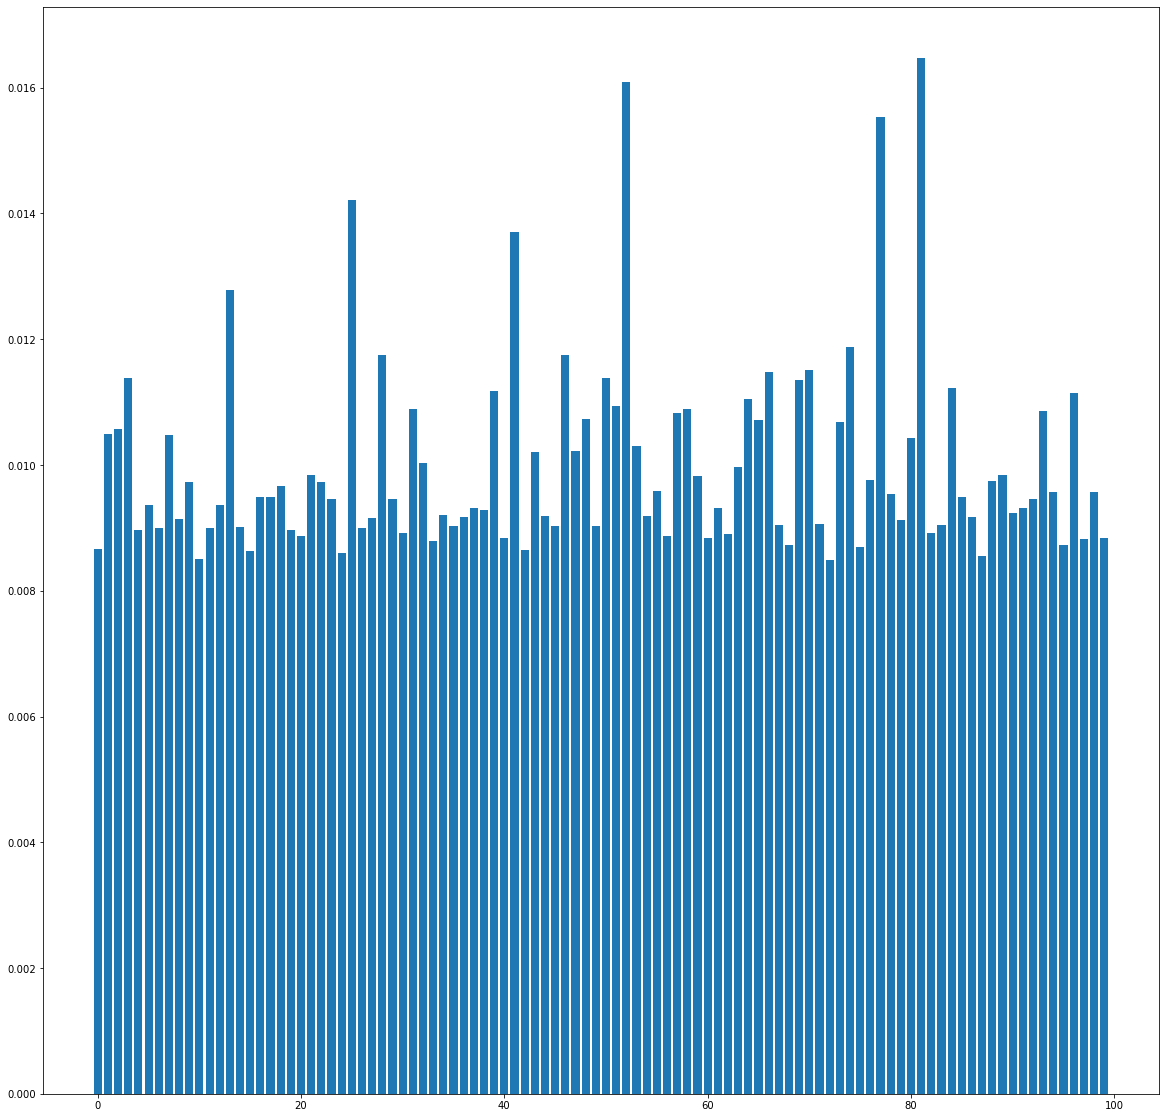

In [74]:
plt.figure(figsize=(20,20))
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()